In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/customer/retail_price.csv')
data.head()

,product_category_name,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed_bath_table,1,45.95,15.100000,45.95,39,161,2,350,4.0,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed_bath_table,3,137.85,12.933333,45.95,39,161,2,350,4.0,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed_bath_table,6,275.70,14.840000,45.95,39,161,2,350,4.0,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed_bath_table,4,183.80,14.287500,45.95,39,161,2,350,4.0,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed_bath_table,2,91.90,15.100000,45.95,39,161,2,350,4.0,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/customer/retail_price.csv')

# List of categorical columns to be label encoded
categorical_columns = ['product_category_name']

# Initialize LabelEncoder
label_encoders = {}

# Apply label encoding to each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save the encoder if you need to inverse transform later

# Save the modified dataset to a new file
data.to_csv('/content/drive/MyDrive/customer/retail_price1.csv', index=False)

# Display the first few rows of the modified dataset
data.head()


,product_category_name,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,0,1,45.95,15.100000,45.95,39,161,2,350,4.0,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,0,3,137.85,12.933333,45.95,39,161,2,350,4.0,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,0,6,275.70,14.840000,45.95,39,161,2,350,4.0,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,0,4,183.80,14.287500,45.95,39,161,2,350,4.0,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,0,2,91.90,15.100000,45.95,39,161,2,350,4.0,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [8]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/customer/retail_price1.csv')
data.head()

,product_category_name,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,0,1,45.95,15.100000,45.95,39,161,2,350,4.0,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,0,3,137.85,12.933333,45.95,39,161,2,350,4.0,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,0,6,275.70,14.840000,45.95,39,161,2,350,4.0,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,0,4,183.80,14.287500,45.95,39,161,2,350,4.0,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,0,2,91.90,15.100000,45.95,39,161,2,350,4.0,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [9]:
X = data.drop(['lag_price'], axis=1)
y = data['lag_price']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)


     product_category_name  qty  total_price  freight_price  unit_price  \
0                        0    1        45.95      15.100000   45.950000   
1                        0    3       137.85      12.933333   45.950000   
2                        0    6       275.70      14.840000   45.950000   
3                        0    4       183.80      14.287500   45.950000   
4                        0    2        91.90      15.100000   45.950000   
..                     ...  ...          ...            ...         ...   
671                      0    1       215.00       8.760000  215.000000   
672                      0   10      2090.00      21.322000  209.000000   
673                      0   59     12095.00      22.195932  205.000000   
674                      0   52     10375.00      19.412885  199.509804   
675                      0   32      5222.36      24.324687  163.398710   

     product_name_lenght  product_description_lenght  product_photos_qty  \
0                     3

In [10]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Selected Features: Index(['product_category_name', 'qty', 'total_price', 'freight_price',
       'unit_price', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_score', 'customers',
       'weekday', 'weekend', 'holiday', 'month', 'year', 's', 'volume',
       'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3'],
      dtype='object')
Mean Squared Error with Selected Features: 74.14908575788323


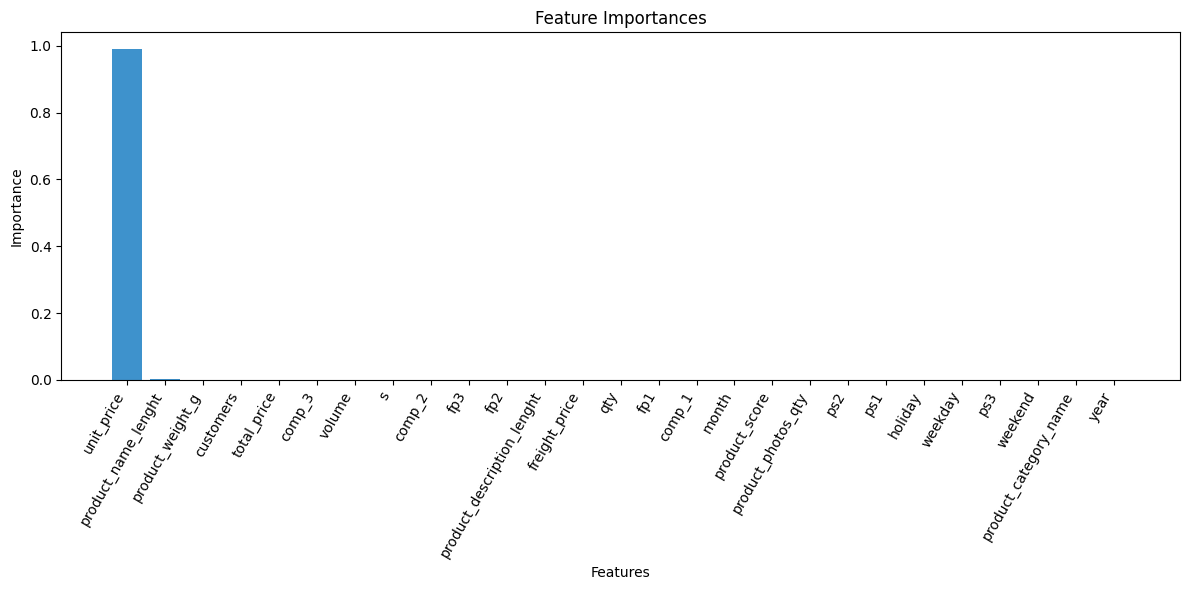

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import random

# A simple Ant Colony Optimization implementation for feature selection

# Define the parameters for ACO
num_ants = 1
num_features = X_train.shape[1]
num_iterations = 5
evaporation_rate = 0.5
alpha = 1
beta = 2

# Initialize pheromone levels
pheromones = np.ones(num_features)

# Define the heuristic information (can be uniform)
heuristic = np.ones(num_features)

# Define the probability of selecting each feature
def calculate_probabilities(pheromones, heuristic, alpha, beta):
    return (pheromones ** alpha) * (heuristic ** beta)

# Define the fitness function to evaluate a subset of features
def evaluate_feature_subset(features, X_train, y_train, X_val, y_val):
    X_train_subset = X_train[:, features]
    X_val_subset = X_val[:, features]

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_subset, y_train)

    y_pred = model.predict(X_val_subset)
    mse = mean_squared_error(y_val, y_pred)

    return -mse

# Main ACO loop
best_solution = None
best_score = float('-inf')

for iteration in range(num_iterations):
    all_solutions = []
    all_scores = []

    for ant in range(num_ants):
        solution = []

        for feature in range(num_features):
            if random.random() < calculate_probabilities(pheromones[feature], heuristic[feature], alpha, beta):
                solution.append(feature)

        if len(solution) == 0:
            solution = random.sample(range(num_features), k=random.randint(1, num_features))

        all_solutions.append(solution)
        score = evaluate_feature_subset(solution, X_train.values, y_train.values, X_val.values, y_val.values)
        all_scores.append(score)

        if score > best_score:
            best_score = score
            best_solution = solution

    # Update pheromones
    for feature in range(num_features):
        pheromones[feature] *= (1 - evaporation_rate)

        for solution, score in zip(all_solutions, all_scores):
            if feature in solution:
                pheromones[feature] += score

# Display the selected features and their importance
selected_features = X_train.columns[best_solution]
print(f'Selected Features: {selected_features}')

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model = RandomForestRegressor(random_state=42)
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Selected Features: {mse}')

# Assuming the model has already been trained and `importances` is available
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], color='#3e92cc', align='center')
plt.xticks(range(len(indices)), [selected_features[i] for i in indices], rotation=60, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/customer/retail_price2.csv')
data.head()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_weight_g,customers,weekday,s,volume,comp_2,fp2,comp_3,fp3,lag_price
0,1,45.95,15.100000,45.95,39,161,350,57,23,10.267394,3800,215.000000,8.760000,45.95,15.100000,45.90
1,3,137.85,12.933333,45.95,39,161,350,61,22,6.503115,3800,209.000000,21.322000,45.95,12.933333,45.95
2,6,275.70,14.840000,45.95,39,161,350,123,21,12.071651,3800,205.000000,22.195932,45.95,14.840000,45.95
3,4,183.80,14.287500,45.95,39,161,350,90,23,9.293873,3800,199.509804,19.412885,45.95,14.287500,45.95
4,2,91.90,15.100000,45.95,39,161,350,54,21,5.555556,3800,163.398710,24.324687,45.95,15.100000,45.95


In [13]:
X = data.drop(['lag_price'], axis=1)
y = data['lag_price']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)


     qty  total_price  freight_price  unit_price  product_name_lenght  \
0      1        45.95      15.100000   45.950000                   39   
1      3       137.85      12.933333   45.950000                   39   
2      6       275.70      14.840000   45.950000                   39   
3      4       183.80      14.287500   45.950000                   39   
4      2        91.90      15.100000   45.950000                   39   
..   ...          ...            ...         ...                  ...   
671    1       215.00       8.760000  215.000000                   56   
672   10      2090.00      21.322000  209.000000                   56   
673   59     12095.00      22.195932  205.000000                   56   
674   52     10375.00      19.412885  199.509804                   56   
675   32      5222.36      24.324687  163.398710                   56   

     product_description_lenght  product_weight_g  customers  weekday  \
0                           161               350 

In [22]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate Random Forest Regressor with a specific number of estimators
forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)  # Import r2_score from sklearn.metrics
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

#print(f"\nRandom Forest Regressor Model with {num_estimators} Estimators:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 4.38
Mean Squared Error (MSE): 77.56
Root Mean Squared Error (RMSE): 8.81
R-squared (R2): 0.99
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 4.07%


In [16]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Define Ant Colony Optimization (ACO) class
class AntColonyOptimizer:
    def __init__(self, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = None

    def initialize_pheromone(self, param_space):
        # Initialize pheromone matrix as a 2D array, with each row corresponding to a parameter
        self.pheromone = [np.ones(len(param)) for param in param_space]

    def select_hyperparameters(self, param_space):
        selected_params = []
        for i in range(len(param_space)):
            probs = self.pheromone[i] / self.pheromone[i].sum()  # Normalize pheromones to create a probability distribution
            selected_param = np.random.choice(param_space[i], p=probs)
            selected_params.append(selected_param)
        return selected_params

    def optimize(self, param_space, X_train, y_train):
        self.initialize_pheromone(param_space)

        best_params = None
        best_score = -np.inf

        for _ in range(self.n_iterations):
            all_scores = []
            all_params = []

            for _ in range(self.n_ants):
                params = self.select_hyperparameters(param_space)
                model = RandomForestRegressor(
                    n_estimators=params[0],
                    max_depth=params[1],
                    min_samples_split=params[2],
                    random_state=42
                )
                score = cross_val_score(model, X_train, y_train, cv=3).mean()
                all_scores.append(score)
                all_params.append(params)

                if score > best_score:
                    best_score = score
                    best_params = params

            # Pheromone update
            sorted_params = sorted(zip(all_scores, all_params), key=lambda x: x[0], reverse=True)
            for i in range(len(param_space)):
                self.pheromone[i] *= self.decay  # Apply decay to pheromone values
                for _, params in sorted_params[:self.n_best]:
                    selected_index = param_space[i].index(params[i])
                    self.pheromone[i][selected_index] += 1  # Increase pheromone level for successful params

        return best_params

# Hyperparameter search space
param_space = [
    [50, 100, 150, 200],  # n_estimators
    [10, 20, 30, None],   # max_depth
    [2, 5, 10]            # min_samples_split
]

# Initialize and run ACO
aco = AntColonyOptimizer(n_ants=3, n_best=3, n_iterations=20, decay=0.95)
best_params = aco.optimize(param_space, X_train, y_train)

# Train the Random Forest with the best parameters
forest_model = RandomForestRegressor(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    min_samples_split=best_params[2],
    random_state=42
)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

print(f"\nRandom Forest Regressor Model with Optimized Estimators:")
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Random Forest Regressor Model with Optimized Estimators:
Best Hyperparameters: [200, 30, 10]
Mean Absolute Error (MAE): 4.19
Mean Squared Error (MSE): 72.11
Root Mean Squared Error (RMSE): 8.49
R-squared (R2): 0.99
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 4.13%


In [17]:
from sklearn.neighbors import KNeighborsRegressor

# Create and evaluate a KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean(np.log1p(knn_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

print(f"\nKNN Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNN Regression Model:
Mean Absolute Error (MAE): 15.75
Mean Squared Error (MSE): 792.81
Root Mean Squared Error (RMSE): 28.16
R-squared (R2): 0.86
Root Mean Squared Logarithmic Error (RMSLE): 0.02
Mean Absolute Percentage Error (MAPE): 16.42%


In [18]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate LGBMRegressor model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

mae = mean_absolute_error(y_test, lgbm_pred)
mse = mean_squared_error(y_test, lgbm_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lgbm_pred)
rmsle = np.sqrt(np.mean(np.log1p(lgbm_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - lgbm_pred) / y_test)) * 100

print("\nLGBMRegressor Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1103
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 15
[LightGBM] [Info] Start training from score 107.975942
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [19]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate SVR model
svr_model = SVR(kernel='rbf')  # You can choose different kernels, like 'linear', 'poly', etc.
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

mae = mean_absolute_error(y_test, svr_pred)
mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svr_pred)
rmsle = np.sqrt(np.mean(np.log1p(svr_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - svr_pred) / y_test)) * 100

print("\nSVR Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



SVR Model:
Mean Absolute Error (MAE): 48.10
Mean Squared Error (MSE): 5314.95
Root Mean Squared Error (RMSE): 72.90
R-squared (R2): 0.06
Root Mean Squared Logarithmic Error (RMSLE): 0.09
Mean Absolute Percentage Error (MAPE): 67.41%


In [20]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate XGBRegressor with additional hyperparameters
xgb_model = xgb.XGBRegressor(
    n_estimators=num_estimators,
    learning_rate=0.05,  # Controls the step size for each boosting step
    max_depth=6,  # Maximum depth of a tree, increasing this can lead to overfitting
    min_child_weight=1,  # Minimum sum of instance weight needed in a child
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    gamma=0,  # Minimum loss reduction required to make a further partition on a leaf node
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)
rmsle = np.sqrt(np.mean(np.log1p(xgb_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - xgb_pred) / y_test)) * 100

print(f"\nXGBRegressor Model with {num_estimators} Estimators and Tuned Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



XGBRegressor Model with 100 Estimators and Tuned Hyperparameters:
Mean Absolute Error (MAE): 5.49
Mean Squared Error (MSE): 99.35
Root Mean Squared Error (RMSE): 9.97
R-squared (R2): 0.98
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 5.36%
